<a href="https://colab.research.google.com/github/Anshu-rai89/KaggleDigitRecognizer/blob/master/Kaggle_DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digital Recognizer Kaggle Competition **

We Will Build Two Model One we will Use Pca To Reduce Our Image Dimension Second We will Use Convolution Neural Network In which We have Two Convulation Layer Each Foolowed By a Pooling Layer with Stride =1 And Padding= SAME . We will Use one Dense Layer followed By Our Output Layer 


**Structure of Data **

We Will Directly import MNIST Data From Tensorflow Datasets With Hot Encoded Labels.

MNIST Dataset have 55000 Training Images With  784 SIze  shape of Training Data is (55000,784)
Train Images are Available In Flatten Format 

Testing Data : Mnist Dataset Have 10000 Testing Images with Shape (10000,784) Available in Flatten Format and Labels Are Hot encoded i.e one lable is array of 10 with 1 present to class it belongs to and rest 0 

**We will First Import our data Find out Training and Testing Shape Apply Pca And will Reduce Dimension of images Kepping 99% of information Than we will feeed that Data to SVM **

**IN second Model We will Build two Convulation Layer using Tensorflow  Each having 32 and 64 Units Our Convulation layer have filter size of 5*5  and Polling layer 2*2 With Stride =1 And Padding =SAME **

we will find out our Cost on Prediction Then we will Try to reduce our cost using Inbuild Optimizer Available in Tensorflow which will take Learning Rate and Cost And will Reduce Cost 

we will Further Try to reduce our cost By iterating for 25 times where each time we fill Find our cost On Batch size or Batch Gradient Descent Inspite of Passing Whole Data At one Go We will Find out our Cost By Passin Data In Batches 

At last We will Print out Total cost After Every Iteration We will Try to Reach to A minimal Cost 

At last We will Predict on Our Test Data And Analyse our Accuracy By Correct Labels 

In [0]:
import tensorflow as tf

Importing Our Dataset From Tensorflow  Which is available in tenserflow.examples.tutorials.mnist

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f68294793c8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f681fe05d68>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f681fe05978>)

In [0]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [0]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [0]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [0]:
mnist.validation.images.shape

(5000, 784)

In [0]:
import matplotlib.pyplot as plt

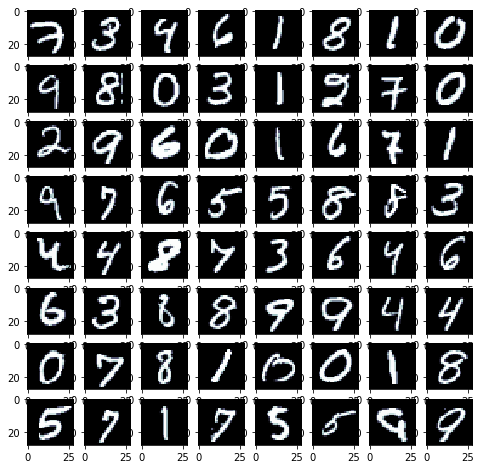

In [0]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(mnist.train.images.reshape((55000,28,28))[i],cmap=plt.cm.bone)
    
plt.show()

In [0]:
from sklearn.decomposition import PCA

In [0]:
mnist1 = input_data.read_data_sets("MNIST_data/", one_hot = False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
mnist1.train.images.shape,mnist1.train.labels.shape

((55000, 784), (55000,))

In [0]:
mnist1.test.images.shape, mnist1.test.labels.shape

((10000, 784), (10000,))

In [0]:
pca=PCA()
pca.fit(mnist1.train.images,mnist1.train.labels)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.components_.shape

(784, 784)

In [0]:
k=0
total=0
while total<0.99:
    total+=pca.explained_variance_ratio_[k]
    k=k+1
k

331

In [0]:
pca=PCA(n_components=k,whiten=True)
x_transform=pca.fit_transform(mnist1.train.images)
x_test_pca=pca.transform(mnist1.test.images)

In [0]:
from sklearn import svm
import numpy as np

55000

In [0]:
clf1=svm.SVC()
clf1.fit(x_transform,mnist1.train.labels)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
predict_svm=clf1.predict(x_test_pca)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(mnist1.test.labels,predict_svm)

0.9634

**Accuracy With SVM is 96.34**

**Further Optimization In Svm **

We can optimize our Svm classifier By finding out Optimal Values of C And Gamma(Regularization )
Using GridsearchCv 


**Building Our Second Model **


In [0]:
input_image_width = 28
input_image_height = 28
input_image_channels = 1
input_image_pixels = 784

no_of_units_conv1 = 32
no_of_units_conv2 = 64
stride_conv1 = 1
stride_conv2 = 1
conv1_filter = 5
conv2_filter = 5
max_pool1_k = 2
max_pool2_k = 2

no_of_units_hidden_layer = 1024
no_of_units_output_layer = 10
input_size_to_hidden = (input_image_width//(max_pool1_k*max_pool2_k)) * (input_image_height//(max_pool1_k*max_pool2_k)) *no_of_units_conv2


In [0]:
weights = {
    "wconv1" : tf.Variable(tf.random_normal([conv1_filter, conv1_filter, input_image_channels, no_of_units_conv1])),
    "wconv2" : tf.Variable(tf.random_normal([conv2_filter, conv2_filter, no_of_units_conv1,no_of_units_conv2])),
    "whidden_layer1" : tf.Variable(tf.random_normal([input_size_to_hidden,no_of_units_hidden_layer])),
    "woutput" : tf.Variable(tf.random_normal([no_of_units_hidden_layer, no_of_units_output_layer]))
}

biases = {
    "bconv1" : tf.Variable(tf.random_normal([no_of_units_conv1])),
    "bconv2" : tf.Variable(tf.random_normal([no_of_units_conv2])),
    "bhidden_layer1" : tf.Variable(tf.random_normal([no_of_units_hidden_layer])),
    "boutput" : tf.Variable(tf.random_normal([no_of_units_output_layer])),
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def convulation(x, weights, bias, strides = 1):
    out = tf.nn.conv2d(x, weights, padding="SAME", strides = [1, strides, strides, 1])
    out = tf.nn.bias_add(out, bias)
    out = tf.nn.relu(out)
    return out

def maxpooling(x, k = 2):
    return tf.nn.max_pool(x, padding = "SAME", ksize = [1, k, k, 1], strides = [1, k, k, 1])

In [0]:
def cnn(x, weights, biases, keep_prob):
    x = tf.reshape(x, shape = [-1 ,input_image_height, input_image_width, input_image_channels])
    convul1 = convulation(x, weights['wconv1'], biases['bconv1'], stride_conv1)
    convul1_pool = maxpooling(convul1, max_pool1_k)
    
    convul2 = convulation(convul1_pool, weights['wconv2'], biases['bconv2'], stride_conv2)
    convul2_pool = maxpooling(convul2, max_pool2_k)
    
    hidden_layer_input = tf.reshape(convul2_pool, shape = [-1, input_size_to_hidden])
    hidden_layer_output_before_activation = tf.add(tf.matmul(hidden_layer_input, weights['whidden_layer1']), biases['bhidden_layer1'])
    hidden_layer_output_before_dropout = tf.nn.relu(hidden_layer_output_before_activation)
    hidden_layer_output = tf.nn.dropout(hidden_layer_output_before_dropout, keep_prob) 
   
    output = tf.add(tf.matmul(hidden_layer_output, weights['woutput']), biases['boutput'])
    return output

In [0]:
x = tf.placeholder("float", [None, input_image_pixels])
y = tf.placeholder(tf.int32, [None, no_of_units_output_layer])
keep_prob = tf.placeholder("float")
pred = cnn(x, weights, biases, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels = y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Finding OUT Cost In Batches 
Batch size is 100 And We have our Data Presesnt in Batches In Mnist

In [0]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y, keep_prob:0.8})
        total_cost += c
    print(total_cost)

820269.5673208237
30944.806359052658
17587.70692006126
11453.372914715646
8938.105173596783
7072.5648676082565
6398.90689133372
5806.571886829412
5510.322079180245
6108.594479219057
4318.183180144191
3604.643419545834
2933.3642968548597
4161.303013977702
3127.8623188877336
2985.639475888037
2168.3316611855576
2456.142408820661
2362.676978334396
1765.6981250172203
1900.9086323736585
2061.343553113278
1994.5978122448382
1633.0025793955767
2044.3261894297857


In [0]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_preds  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels, keep_prob:1.0})
correct_preds.sum()

9845

**Accuracy With CNN is 98 .45**